# Face Detection with UniFace

This notebook demonstrates face detection using the **UniFace** library.

## 1. Install UniFace

In [ ]:
!pip install -q uniface

## 2. Import Libraries

In [1]:
import cv2
import IPython.display as display
from PIL import Image

from uniface.detection import RetinaFace
from uniface.visualization import draw_detections

## 3. Initialize the Detector

In [2]:
detector = RetinaFace(
    conf_thresh=0.5,
    nms_thresh=0.4,
)

✓ Model loaded (CoreML (Apple Silicon))


## 4. Load and Display Input Image

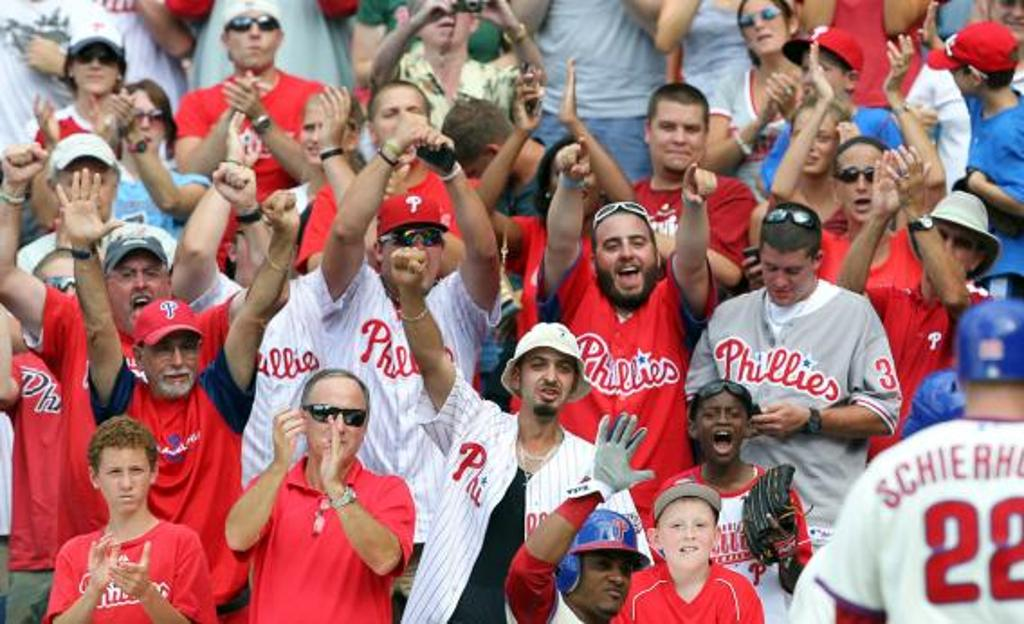

In [3]:
image_path = '../assets/test.jpg'
pil_image = Image.open(image_path)
pil_image

## 5. Detect Faces

Detected 27 face(s)


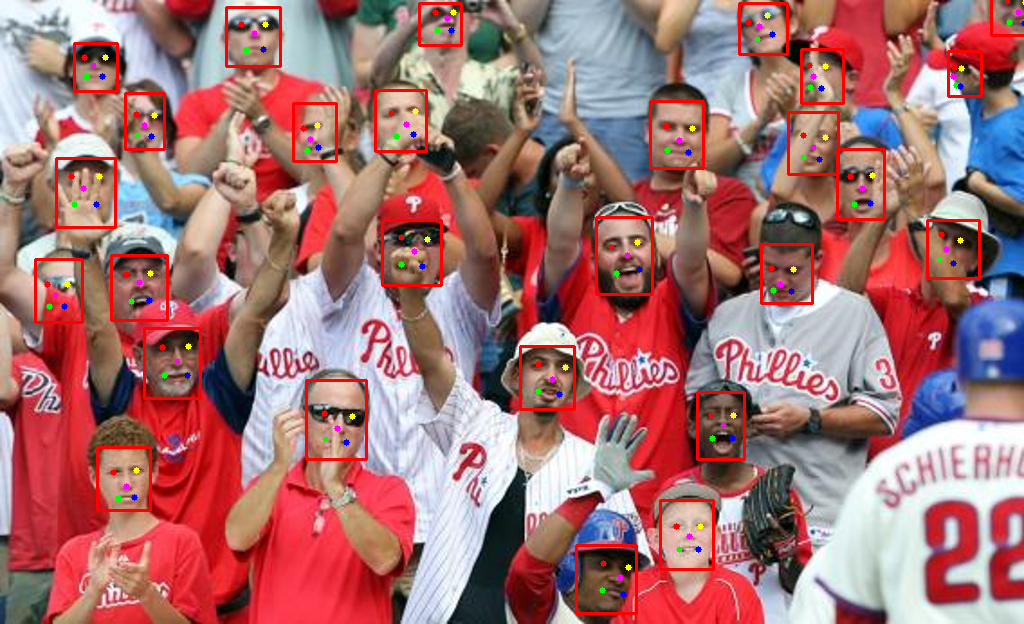

In [6]:
# Load image
image = cv2.imread(image_path)

# Detect faces - returns list of face dictionaries
faces = detector.detect(image)
print(f'Detected {len(faces)} face(s)')

# Unpack face data for visualization
bboxes = [f['bbox'] for f in faces]
scores = [f['confidence'] for f in faces]
landmarks = [f['landmarks'] for f in faces]

# Draw detections
draw_detections(image, bboxes, scores, landmarks, vis_threshold=0.6)

# Display result
output_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display.display(Image.fromarray(output_image))

## 6. Detect Top-K Faces

Use `max_num` to limit the number of detected faces.

### Top-2 faces:

Detected 2 face(s)


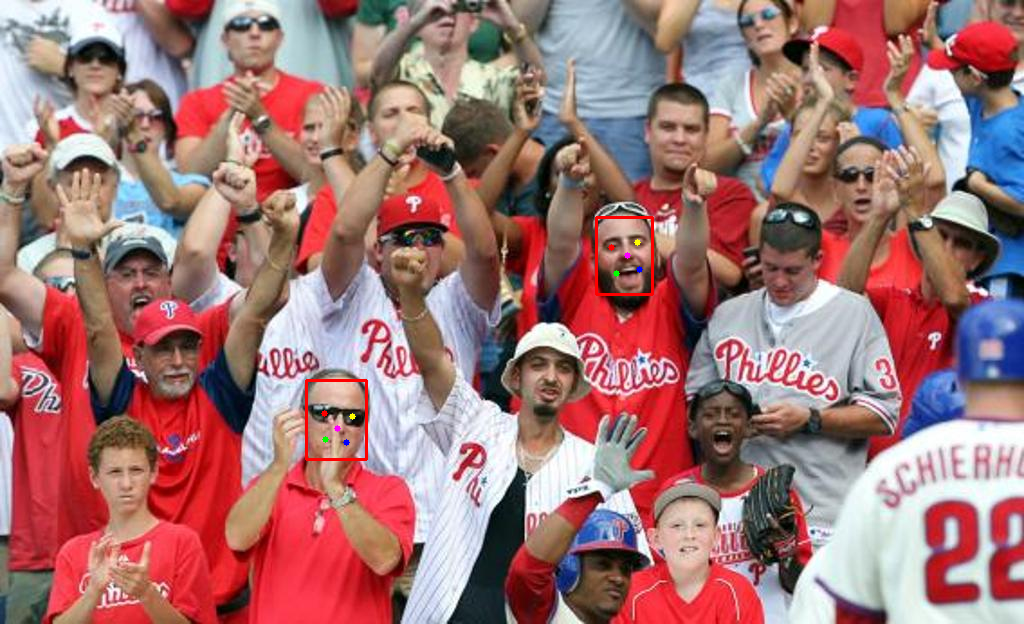

In [7]:
image = cv2.imread(image_path)

faces = detector.detect(image, max_num=2)
print(f'Detected {len(faces)} face(s)')

bboxes = [f['bbox'] for f in faces]
scores = [f['confidence'] for f in faces]
landmarks = [f['landmarks'] for f in faces]

draw_detections(image, bboxes, scores, landmarks, vis_threshold=0.6)

output_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display.display(Image.fromarray(output_image))

### Top-5 faces:

Detected 5 face(s)


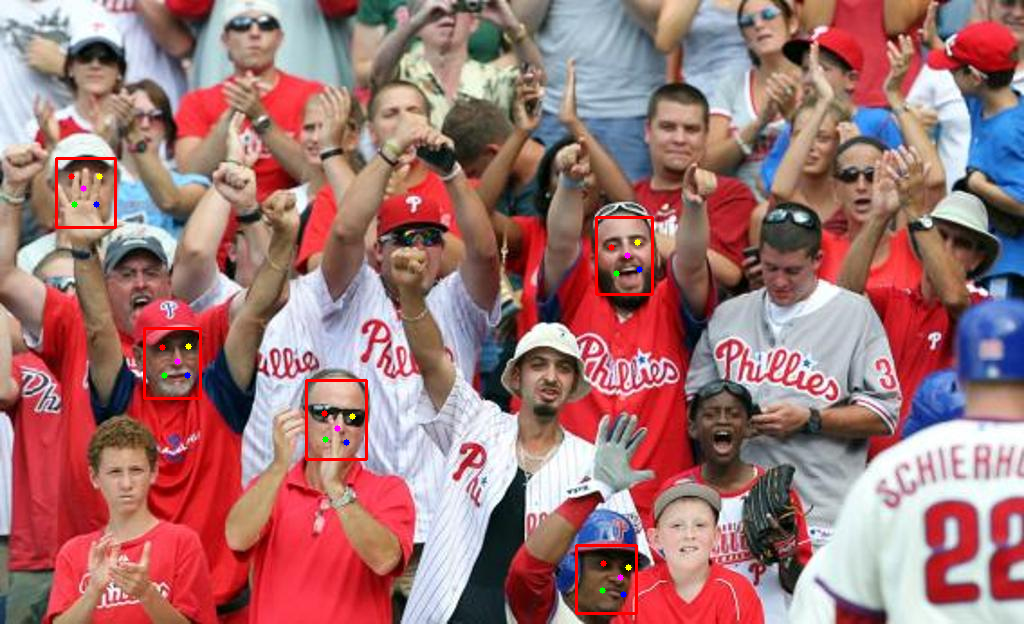

In [8]:
image = cv2.imread(image_path)

faces = detector.detect(image, max_num=5)
print(f'Detected {len(faces)} face(s)')

bboxes = [f['bbox'] for f in faces]
scores = [f['confidence'] for f in faces]
landmarks = [f['landmarks'] for f in faces]

draw_detections(image, bboxes, scores, landmarks, vis_threshold=0.6)

output_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display.display(Image.fromarray(output_image))

## Notes

- `detect()` returns a list of dictionaries with keys: `bbox`, `confidence`, `landmarks`
- Adjust `conf_thresh` and `nms_thresh` for your use case
- Use `max_num` to limit detected faces